In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.constants as scc

In [2]:
d_convRy2eV=scc.physical_constants['Rydberg constant times hc in eV']
convRy2eV=d_convRy2eV[0]

# Input NIST data

In [3]:
fnist='/home/ale/autovarlambda/gpyopt_varlambda/be0+_varlam/'
enerNIST=pd.read_csv(fnist+'NIST_terms.dat',header='infer',skiprows=[0,2],sep='\s+')
cfgsNIST=pd.read_csv(fnist+'NIST_cfgs.dat',header='infer',skiprows=[0,2],sep='\s+')
E_NIST=pd.read_csv(fnist+'NIST_energies.dat',header=None,skiprows=3,sep='\s+')
etot_NIST=E_NIST.loc[0][10]
eion=E_NIST.loc[1][10]
enerNIST.drop(columns='(Ry)',inplace=True)
s=[]
l=[]
cf=[]
nterms=len(enerNIST)
ncfgs=len(cfgsNIST)
for i in range(nterms):
    cfdum=enerNIST.loc[i][0]
    termdum=enerNIST.loc[i][1]
    sdum=int(termdum[0])
    ldum=termdum[1]
    if ldum=='S': ldum=0
    if ldum=='P': ldum=1
    if ldum=='D': ldum=2
    if ldum=='F': ldum=3
    if ldum=='G': ldum=4
    if ldum=='H': ldum=5
    s.append(sdum)
    l.append(ldum)
    for j in range(ncfgs):
        if cfgsNIST.loc[j]['CFG']==cfdum: cf.append(cfgsNIST.loc[j]['i'])
enerNIST.insert(2, 'S', s)
enerNIST.insert(3, 'L', l)
enerNIST.insert(4, 'CF', cf)

In [4]:
def load_ener(folder):
    enert=pd.read_csv(folder+"str/TERMS",sep=" ",delimiter="\s+",header="infer")
    nrow=len(enert)
    idxtot=enert.index[nrow-1]
    etot=enert.loc[idxtot]['ENERGY(RYD)']
    enert.drop(idxtot,inplace=True)
    ncol=len(enert.columns)
    return enert, etot

In [5]:
def load_inpdata(folder):
    data=pd.read_csv(folder+"adas/sg.dat",sep=" ",delimiter="\s+",header=None,skiprows=[0,1])
    enert, etot=load_ener(folder)
#     enert['ENERGY(RYD)']=enert['ENERGY(RYD)']*convRy2eV
    return data, enert, etot

In [6]:
def match_NIST(ener,enerNIST):
    nas=len(ener)
    ncols=len(ener.columns)
    nnist=len(enerNIST)
    newnist=[0]*nas
    idxnist=[0]*nas
    for i in range(nas):
        sas=ener.loc[i]['S']
        las=ener.loc[i]['L']
        cfas=ener.loc[i]['CF']
        for j in range(nnist):
            snist=enerNIST.loc[j]['S']
            lnist=enerNIST.loc[j]['L']
            cfnist=enerNIST.loc[j]['CF']
            if (snist==sas) & (lnist==las) & (cfnist==cfas):
                newnist[i]=enerNIST.loc[j]['Level']
                idxnist[i]=j
    ener.insert(ncols,'NIST',newnist)
    ener.insert(ncols+1,'idx',idxnist)
    return 

In [7]:
def plot_XS(isp1,isp2,data,enert,dipti1,dipti2):
    fig=plt.figure(figsize=(15,5))
    ax1=plt.subplot(121)
    plt.plot(nvdata[0],nvdata[isp1],'tab:blue')
    plt.plot(data[0],data[isp1],'tab:red')
    plt.plot(dipti1[0],dipti1[1],'k')
    ymin, ymax = ax1.get_ylim()
    plt.plot(nvenert['ENERGY(RYD)'],nvenert['ENERGY(RYD)']*0.0+ymax*0.95,'tab:blue',marker='x',markersize=10,linestyle='none')
    plt.plot(enert['ENERGY(RYD)'],enert['ENERGY(RYD)']*0.0+ymax*0.90,'tab:red',marker='x',markersize=10,linestyle='none')
    ax2=plt.subplot(122)
    plt.plot(nvdata[0],nvdata[isp2],'tab:blue')
    plt.plot(data[0],data[isp2],'tab:red')
    plt.plot(dipti2[0],dipti2[1],'k')
    ymin, ymax = ax2.get_ylim()
    plt.plot(nvenert['ENERGY(RYD)'],nvenert['ENERGY(RYD)']*0.0+ymax*0.95,'tab:blue',marker='x',markersize=10,linestyle='none')
    plt.plot(enert3['ENERGY(RYD)'],enert3['ENERGY(RYD)']*0.0+ymax*0.90,'tab:red',marker='x',markersize=10,linestyle='none')
    ax1.axvline(x=ei,ls='--',color='tab:gray')
    ax2.axvline(x=ei,ls='--',color='tab:gray')
    plt.show()

# Input: spectroscopic orbitals 1s-4f

In [8]:
folder="/home/ale/icft_results/be0+/5l_15cfg/spect-1s4f/"
ener_sp1s4f, etot_sp1s4f=load_ener(folder)
match_NIST(ener_sp1s4f,enerNIST)

In [9]:
folder="/home/ale/icft_results/be0+/5l_15cfg/spect-1s4f_pseudo-5l/novar/"
ener_ps5l_nv, etot_ps5l_nv=load_ener(folder)
match_NIST(ener_ps5l_nv,enerNIST)

In [ ]:
enert=pd.read_csv("varyspect-1s4f/TERMS",sep=" ",delimiter="\s+",header="infer")
nrow=len(enert)
idxtot=enert.index[nrow-1]
etot=enert.loc[idxtot]['ENERGY(RYD)']
enert.drop(idxtot,inplace=True)
ncol=len(enert.columns)
ener_varyspec=enert
match_NIST(ener_varyspec,enerNIST)

In [ ]:
enert=pd.read_csv("varypseudo-5l/TERMS",sep=" ",delimiter="\s+",header="infer")
nrow=len(enert)
idxtot=enert.index[nrow-1]
etot=enert.loc[idxtot]['ENERGY(RYD)']
enert.drop(idxtot,inplace=True)
ncol=len(enert.columns)
ener_varypseudo=enert
match_NIST(ener_varypseudo,enerNIST)

In [42]:
plt.rcParams.update({'font.size': 22})

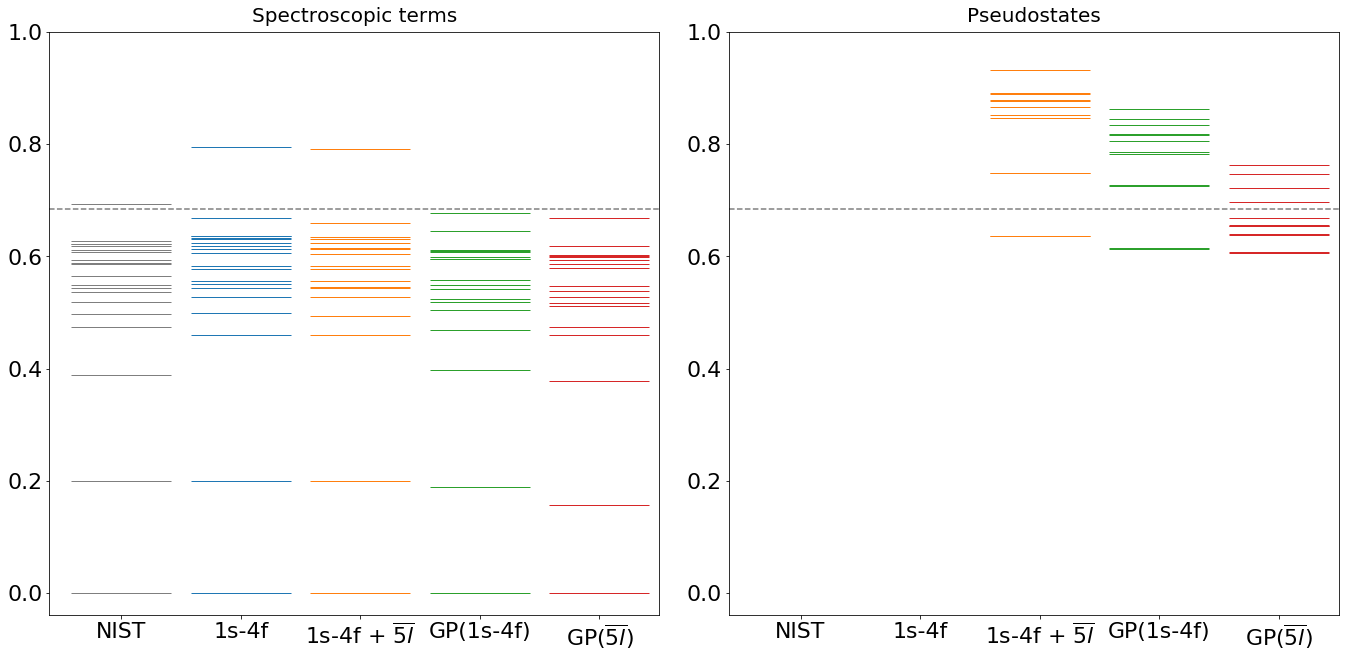

In [65]:
spect_nv=ener_ps5l_nv.loc[ener_ps5l_nv.loc[:]['CF']<10]['ENERGY(RYD)']
xs_nv=spect_nv*0+2
pseudo_nv=ener_ps5l_nv.loc[ener_ps5l_nv.loc[:]['CF']>=10]['ENERGY(RYD)']
xp_nv=pseudo_nv*0+2
spect_gp=ener_varyspec.loc[ener_varyspec.loc[:]['CF']<10]['ENERGY(RYD)']
xs_gp=spect_gp*0+4
pseudo_gp=ener_varyspec.loc[ener_varyspec.loc[:]['CF']>=10]['ENERGY(RYD)']
xp_gp=pseudo_gp*0+4
sp_test=ener_varypseudo.loc[ener_varypseudo.loc[:]['CF']<10]['ENERGY(RYD)']
xs_test=sp_test*0+3
ps_test=ener_varypseudo.loc[ener_varypseudo.loc[:]['CF']>=10]['ENERGY(RYD)']
xp_test=ps_test*0+3

xmin=-0.6
xmax=4.5
fig=plt.figure(figsize=(6.4*3,4.8*2))
ax1=plt.subplot(121)
ax1.set_title('Spectroscopic terms',fontsize=20,pad=10)
plt.plot(enerNIST['Level']*0,enerNIST['Level'],'_',markersize=100,c='tab:gray')
plt.plot(ener_sp1s4f['ENERGY(RYD)']*0+1,ener_sp1s4f['ENERGY(RYD)'],'_',markersize=100,c='tab:blue')
plt.plot(xs_nv,spect_nv,'_',markersize=100,c='tab:orange')
plt.plot(xs_test,sp_test,'_',markersize=100,c='tab:green')
plt.plot(xs_gp,spect_gp,'_',markersize=100,c='tab:red')
plt.hlines(eion,xmin,xmax,colors='tab:gray',linestyles='dashed')
ymin, ymax = plt.ylim()
ymax=1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
my_xticks = ['NIST','1s-4f',r'1s-4f + $\overline{5l}$','GP(1s-4f)','GP($\overline{5l}$)']
plt.xticks([0,1,2,3,4], my_xticks)
ax2=plt.subplot(122)
ax2.set_title('Pseudostates',fontsize=20,pad=10)
plt.plot(xp_nv,pseudo_nv,'_',markersize=100,c='tab:orange')
plt.plot(xp_test,ps_test,'_',markersize=100,c='tab:green')
plt.plot(xp_gp,pseudo_gp,'_',markersize=100,c='tab:red')
plt.hlines(eion,xmin,xmax,colors='tab:gray',linestyles='dashed')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
my_xticks = ['NIST','1s-4f',r'1s-4f + $\overline{5l}$','GP(1s-4f)','GP($\overline{5l}$)']
plt.xticks([0,1,2,3,4], my_xticks)
plt.tight_layout()
plt.savefig('be0+_termenergies.eps')
plt.show()

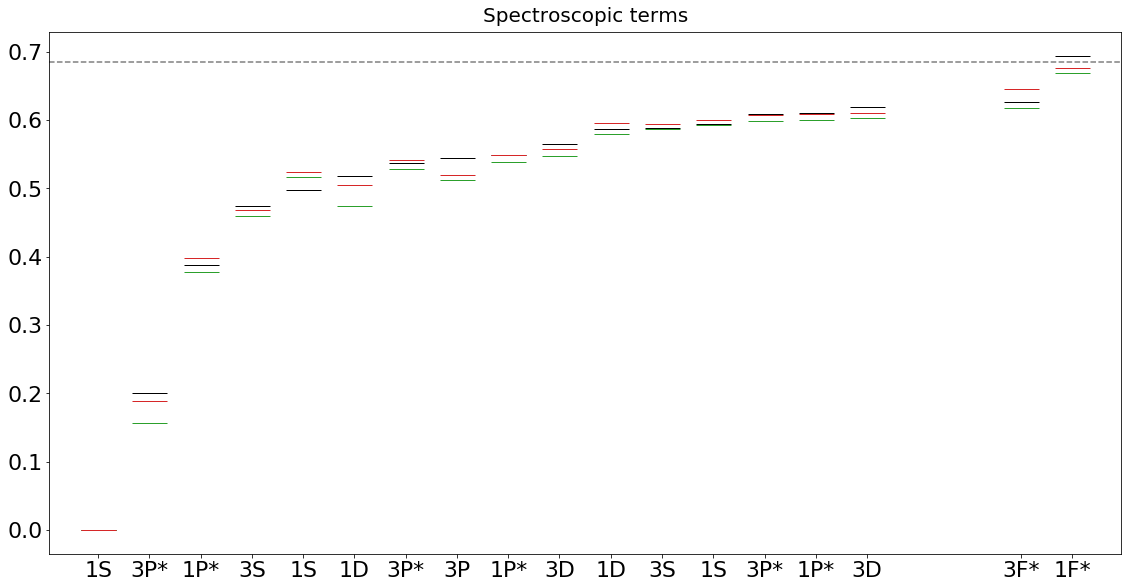

In [49]:
maxcfg=10
nist=enerNIST.loc[enerNIST.loc[:]['CF']<maxcfg]['Level']
x_nist=nist.index
spect=ener_sp1s4f.loc[ener_sp1s4f.loc[:]['CF']<maxcfg]['ENERGY(RYD)']
x_spect=ener_sp1s4f.loc[ener_sp1s4f.loc[:]['CF']<maxcfg]['idx']
spect_nv=ener_ps5l_nv.loc[ener_ps5l_nv.loc[:]['CF']<maxcfg]['ENERGY(RYD)']
xs_nv=ener_ps5l_nv.loc[ener_ps5l_nv.loc[:]['CF']<maxcfg]['idx']
spect_gp=ener_ps5l_gp.loc[ener_ps5l_gp.loc[:]['CF']<maxcfg]['ENERGY(RYD)']
xs_gp=ener_ps5l_gp.loc[ener_ps5l_gp.loc[:]['CF']<maxcfg]['idx']
test_gp=ener_test.loc[ener_test.loc[:]['CF']<maxcfg]['ENERGY(RYD)']
xs_test=ener_test.loc[ener_test.loc[:]['CF']<maxcfg]['idx']

fig=plt.figure(figsize=(6.4*3,4.8*2))
ax1=plt.subplot(111)
ax1.set_title('Spectroscopic terms',fontsize=20,pad=10)
plt.plot(x_nist,nist,'_',markersize=35,c='k')
# plt.plot(ener_sp1s4f['idx'],ener_sp1s4f['ENERGY(RYD)'],'_',markersize=35,c='tab:blue')
# plt.plot(xs_nv,spect_nv,'_',markersize=35,c='tab:orange')
plt.plot(xs_gp,spect_gp,'_',markersize=35,c='tab:green')
plt.plot(xs_test,test_gp,'_',markersize=35,c='tab:red')
xmin, xmax = plt.xlim()
plt.hlines(eion,xmin,xmax,colors='tab:gray',linestyles='dashed')
plt.xlim(xmin,xmax)
my_xticks = enerNIST.loc[:]['Term'].tolist()
plt.xticks(x_nist, my_xticks)
plt.show()

In [ ]:
emin=0
emax=1.75
fig=plt.figure(figsize=(6.4*3,4.8))
ax1=plt.subplot(131)
ii=2
ax1.set_title(r'$2s^2\,^1S \rightarrow 2s 2p\,^3P$',fontsize=20,pad=10)
plt.plot(dipti_data2[0]/convRy2eV,dipti_data2[1],'tab:gray',linewidth=3,label='Dipti')
plt.plot(ps4l5l_nv[0],ps4l5l_nv[ii],'tab:orange',label='pseudo 4l5l')
plt.plot(ps4l5l_gp[0],ps4l5l_gp[ii],'tab:green',label='GP pseudo 4l5l')
plt.legend(loc='best')
plt.axvline(eion,linestyle='dashed', color='tab:gray')
plt.xlim(emin,emax)

ax2=plt.subplot(132)
ii=3
ax2.set_title(r'$2s^2\,^1S \rightarrow 2s 2p\,^1P$',fontsize=20,pad=10)
plt.plot(dipti_data3[0]/convRy2eV,dipti_data3[1],'tab:gray',linewidth=3,label='Dipti')
plt.plot(ps4l5l_nv[0],ps4l5l_nv[ii],'tab:orange',label='pseudo 4l5l')
plt.plot(ps4l5l_gp[0],ps4l5l_gp[ii],'tab:green',label='GP pseudo 4l5l')
plt.legend(loc='best')
plt.axvline(eion,linestyle='dashed', color='tab:gray')
plt.xlim(emin,emax)

ax3=plt.subplot(133)
ii=4
ax3.set_title(r'$2s^2\,^1S \rightarrow 2s 3s\,^3S$',fontsize=20,pad=10)
plt.plot(dipti_data4[0]/convRy2eV,dipti_data4[1],'tab:gray',linewidth=3,label='Dipti')
plt.plot(ps4l5l_nv[0],ps4l5l_nv[ii],'tab:orange',label='pseudo 4l5l')
plt.plot(ps4l5l_gp[0],ps4l5l_gp[ii],'tab:green',label='GP pseudo 4l5l')
plt.legend(loc='best')
plt.axvline(eion,linestyle='dashed', color='tab:gray')
plt.xlim(emin,emax)

plt.show()

In [ ]:
spect_nv=ener_ps4l5l_nv.loc[ener_ps4l5l_nv.loc[:]['CF']<7]['ENERGY(RYD)']
xs_nv=spect_nv*0+2
pseudo_nv=ener_ps4l5l_nv.loc[ener_ps4l5l_nv.loc[:]['CF']>=7]['ENERGY(RYD)']
xp_nv=pseudo_nv*0+2
spect_gp=ener_ps4l5l_gp.loc[ener_ps4l5l_gp.loc[:]['CF']<7]['ENERGY(RYD)']
xs_gp=spect_gp*0+3
pseudo_gp=ener_ps4l5l_gp.loc[ener_ps4l5l_gp.loc[:]['CF']>=7]['ENERGY(RYD)']
xp_gp=pseudo_gp*0+3


xmin=-0.6
xmax=3.4
fig=plt.figure(figsize=(6.4*3,4.8*2))
ax1=plt.subplot(121)
ax1.set_title('Spectroscopic terms',fontsize=20,pad=10)
plt.plot(enerNIST['Level']*0,enerNIST['Level'],'_',markersize=100,c='tab:gray')
plt.plot(xs_nv,spect_nv,'_',markersize=100,c='tab:orange')
plt.plot(xs_gp,spect_gp,'_',markersize=100,c='tab:green')
plt.hlines(eion,xmin,xmax,colors='tab:gray',linestyles='dashed')
plt.xlim(xmin,xmax)
ax2=plt.subplot(122)
ax2.set_title('Pseudostates',fontsize=20,pad=10)
plt.plot(xp_nv,pseudo_nv,'_',markersize=100,c='tab:orange')
plt.plot(xp_gp,pseudo_gp,'_',markersize=100,c='tab:green')
plt.hlines(eion,xmin,xmax,colors='tab:gray',linestyles='dashed')
plt.xlim(xmin,xmax)
plt.tight_layout()
plt.show()